# Intermediate Python: Programming

# Class 2

In our last class, 
we used NumPy to work with arrays,
created plots with matplotlib,
and used for loops to repeat actions.

We'll continue working with those same data files and add to our reproducible workflow to automate data analysis.
By the end of this class,
you should be able to:

- make choices using conditional statements (`if`, `elif`, `else`)
- evaluate expressions containing `and` and `or`
- create functions

## Applying for loops to inflammation data

The last section of the previous class used for loops to repeat actions across mutliple file names.
We're ready to integrate this programming method into our data visualization for the arthritis inflammation data:

data/inflammation-01.csv


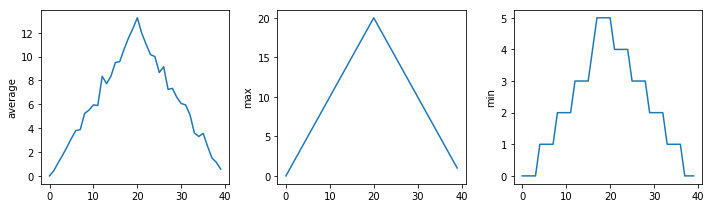

data/inflammation-02.csv


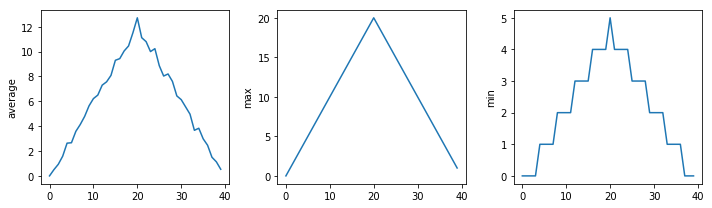

data/inflammation-03.csv


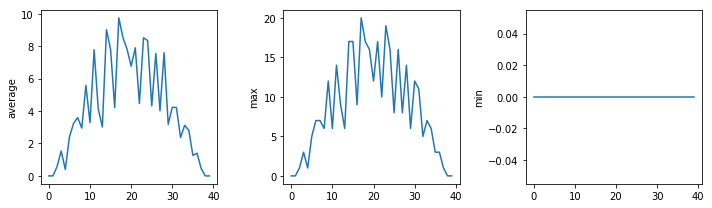

data/inflammation-04.csv


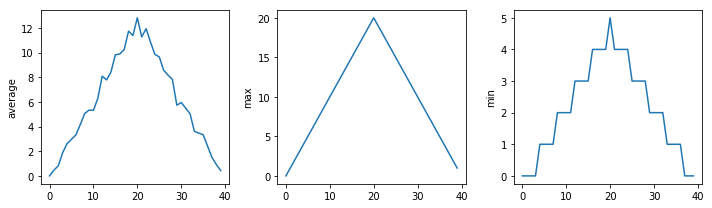

data/inflammation-05.csv


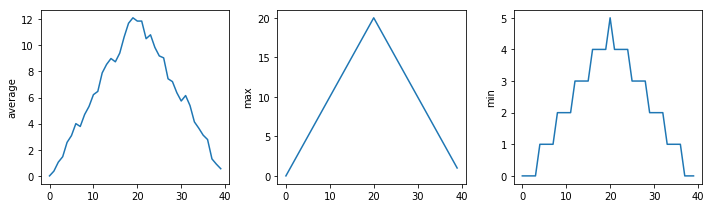

data/inflammation-06.csv


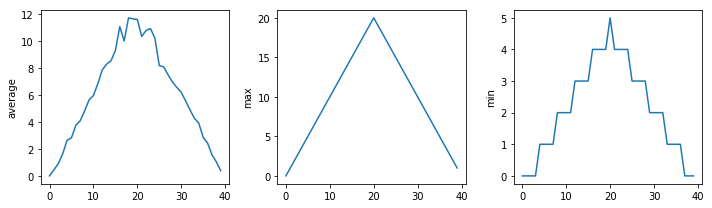

data/inflammation-07.csv


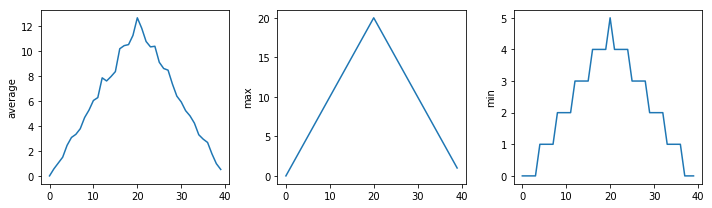

data/inflammation-08.csv


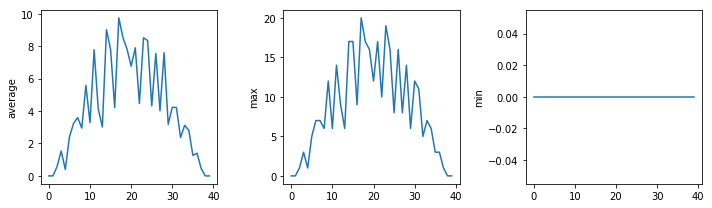

data/inflammation-09.csv


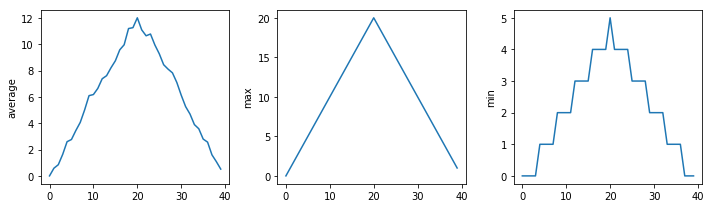

data/inflammation-10.csv


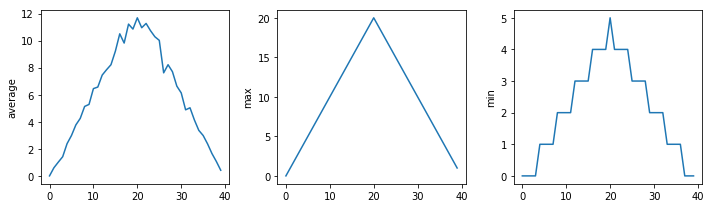

data/inflammation-11.csv


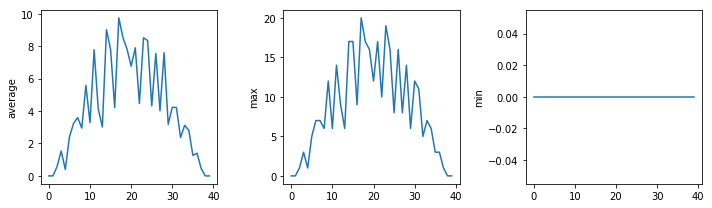

data/inflammation-12.csv


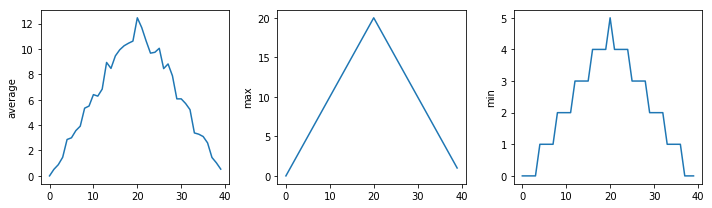

In [2]:
# plot average inflammation for each file in a separate plot
import glob
import numpy as np
import matplotlib.pyplot as plt

filenames = sorted(glob.glob("data/inflammation*.csv"))
for filename in filenames:
    print(filename)

    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(np.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show() 

>#### Challenge-show
*Optional:* We've noted that `plt.show()` may not be necessary for plots to appear using some Python interpreters. Try removing this line from the following for loop and view the output. How do you explain the results?

>#### Challenge-three
*Optional:* How could you modify the loop coded above so only the first three data files are visualized?

## Making choices

The results from the plots above indicate that at least one of our datasets may have suspicious data,
likely related to data entry error.

In this section,
we'll explore ways to use Python to help us determine which files are erroneous,
and which errors apply to each file.

So far, 
we've been building our programming skills with Python to automate analyses by repeating actions.
Eventually, though, we'll encounter circumstances where we need Python to run certain code under some circumstances,
but to run other code under other circumstances. 
Running code based on certain criteria relies on conditional statements.

An example would be assessing whether a given value is greater than a certain number:

In [6]:
num = 3

if num > 0:
    print(num, "is positive")

3 is positive


This example accurately assesses the condition,
and also demonstrates the general syntax for an `if` statement:

```
if CONDITION:
    ACTION
```

If we used a number that did *not* meet the condition, however,
the output would be more cryptic, 
since nothing would be printed to the screen:

In [7]:
num = -3

print("before conditional...")
if num > 100:
    print(num, "is positive")
print("...after conditional")


before conditional...
...after conditional


In the example above,
the condition is not met,
so no statements are printed as a part of the conditionals.
Our additional print statements allow us to determine 
(by inference)
that the condition is not met.

We could include an additional option that would let us know the condition has not been met:

In [10]:
num = -3

if num > 0:
    print(num, "is positive")
else:
    print(num, "is negative")

-3 is negative


This accurately represents this particular output.
However, if we input zero, 
we'd be told it was negative as well.

We can include multiple alternatives using `elif`:

In [11]:
num = 0

if num > 0:
    print(num, "is positive")
elif num == 0: 
    print(num, "is zero")
else:
    print(num, "is negative")

0 is zero


The double equal signs (`==`) are required in the code above to denote mathematical equivalency, 
and to differentiate from a single equal sign for parameter and variable assignment.

Developing this code has shown us a few features of if/else statements:
- `if` statements can be used alone 
- `elif` provides an alternative condition; 
there can be multiple `elif` included in the `if` statement
- `else` accommodates any input that does not meet the `if` and `elif` conditions above

We can also combine conditions.
Use of `and` indicates that both conditions must be true:

In [13]:
if (1 > 0) and (-1 < 0):
    print("both parts are true")
else:
    print("at least one part is false")

both parts are true


Try switching the numbers above to make one of the conditions false so you can obtain the alternative answer.

Combining conditions using `if` indicates only one condition must be true:

In [14]:
if (1 < 0) or (-1 < 0):
    print("at least one part is true")
else:
    print("both parts are false")

at least one part is true


In the code above,
we've demonstrated combining conditions using `if`,
as well as assessing statements using logical (true/false) outputs.

>#### Challenge-conditionals
Given the following code, what answer (A, B, or C) do you expect to be correct? How would you rewrite the code to get another answer?
```
if 4 < 5:
    print("A")
elif 4 == 5:
    print("B")
elif 4 < 5:
    print("C")
```

## Applying conditionals to inflammation

Now that we understand conditional statements, 
let's begin applying them to our inflammation data.
We'll be using conditionals to assess whether our data possess any potential errors,
since our visualizations in the previous class indicated possibly suspicious patterns.

We'll begin by setting up a comparison between two different days in the study:

In [8]:
import numpy as np

data = np.loadtxt(fname="data/inflammation-01.csv", delimiter=",")

max_inflammation_0 = np.max(data, axis=0)[0] # max for early day
max_inflammation_20 = np.max(data, axis=0)[20] # max for middle day

We can use the code above to evaluate whether the data entered for a specific day is exactly the same as the day,
which would indicate an error in data entry:

In [9]:
# check if max equals day number
if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print("Suspicious looking maxima!")

Suspicious looking maxima!


At least for our first data file,
it seems like we have cause to be suspicious.

Next, we can evaluate whether there are any patients *without* inflammation present in our dataset:

In [10]:
# check if any patients are have zero total inflammation
if np.sum(np.min(data, axis=0)) == 0:
    print("Minima add up to zero!")

We can combine these conditional statements together,
while also testing on another data file:

In [11]:
# test both conditions on another data file
data = np.loadtxt(fname="data/inflammation-03.csv", delimiter=",")

max_inflammation_0 = np.max(data, axis=0)[0]
max_inflammation_20 = np.max(data, axis=0)[20]

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print("Suspicious looking maxima!")
elif np.sum(np.min(data, axis=0)) == 0:
    print("Minima add up to zero!")
else:
    print("Seems OK!")


Minima add up to zero!


>#### Challenge-more-vowels
- Write a conditional statement that assesses whether a character is a vowel.
- Include the conditional statement in a for loop that counts the number of vowels in a character string.
- Test your code on a few individual words and full sentences.

## Creating functions

For loops and conditionals represent two powerful programming structures for automating our work.
The last section of today's material will cover another programming approach:
creating our own functions.

We'll begin by exploring some basic functions that convert temperatures:

In [12]:
# define a function that converts F to C
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))

# test function
fahr_to_celsius(32)

0.0

You may interpret from the function name that this converts Fahrenheit to Celsius.

As with other programming structures, 
the format here is formulaic:

```python
def FUNCTION_NAME(VARIABLE):
    return (ACTION)
```

Then we run the function:

```python
FUNCTION_NAME(TEST_VALUE)
```

You may wonder why this function uses `return()` instead of `print()`.
This is because `print()` is used to provide human readable output,
while `return()` [indicates that the function is complete](https://pythonprinciples.com/blog/print-vs-return/), 
and provides the output in a way Python can understand as well.

We can make the output of the print statement more meaningful for us to understand with improved `print` statements,
and also test on another value:

In [13]:
print("freezing point of water:", fahr_to_celsius(32), "C")
print("boiling point of water:", fahr_to_celsius(212), "C")

freezing point of water: 0.0 C
boiling point of water: 100.0 C


Similarly, we can write another function that converts Celsius to Kelvin:

In [14]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print("freezing point of water in Kelvin:", celsius_to_kelvin(0.))

freezing point of water in Kelvin: 273.15


We can then use these two functions to convert from Fahrenheit to Kelvin.
Applying a function (or more) to creation of another function is called function composition: 

In [15]:
# converting F to K
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print("boiling point of water in Kelvin:", fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


This example highlights two important points related to writing functions:

- write functions to complete discrete tasks,
starting with small actions and using them together to build complexity
- name your functions with informative names, 
since you'll be referencing them throughout your work

>#### Challenge-fence 
You can "add" strings together using `+`, 
such as: `"a" + "b"`.
Write a function called `fence` that takes two parameters called `original` and `wrapper` and returns a new string that has the wrapper character at the beginning and end of the original. A call to your function should look like this:
- input: `print(fence('name', '*'))`
- output: `*name*`

Let's now encase our data visualization code from the last class into a function called `analyze`:

In [16]:
import matplotlib.pyplot as plt

def analyze(filename):

    data = np.loadtxt(fname=filename, delimiter=",")

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel("average")
    axes1.plot(np.mean(data, axis=0))

    axes2.set_ylabel("max")
    axes2.plot(np.max(data, axis=0))

    axes3.set_ylabel("min")
    axes3.plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show()

Next, let's create a function to detect errors in our data associated with the minima and maxima for each patient:

In [17]:
def detect_problems(filename):

    data = np.loadtxt(fname=filename, delimiter=",")

    if np.max(data, axis=0)[0] == 0 and np.max(data, axis=0)[20] == 20:
        print("Suspicious looking maxima!")
    elif np.sum(np.min(data, axis=0)) == 0:
        print("Minima add up to zero!")
    else:
        print("Seems OK!")

>#### Challenge-test 
Write code to test your two new functions (`analyze` and `detect_problems`).

Now,
we'll apply both functions across the first three files using a for loop:

data/inflammation-01.csv


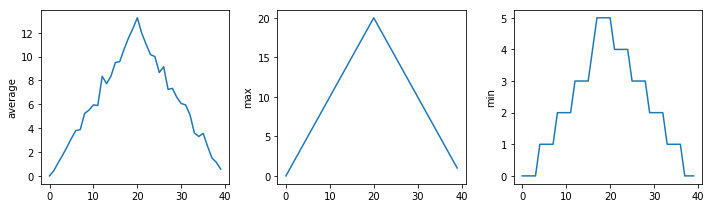

Suspicious looking maxima!
data/inflammation-02.csv


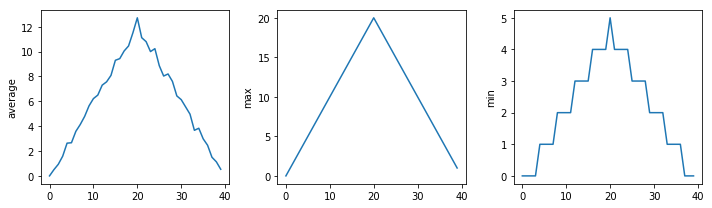

Suspicious looking maxima!
data/inflammation-03.csv


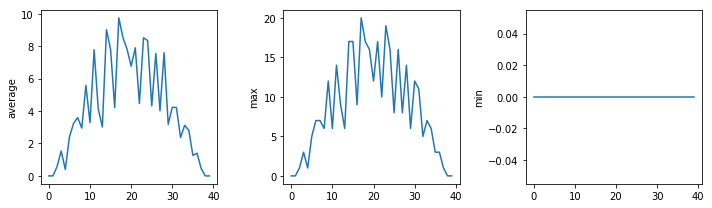

Minima add up to zero!


In [18]:
import glob

filenames = sorted(glob.glob("data/inflammation*.csv"))

for f in filenames[:3]:
    print(f)
    analyze(f)
    detect_problems(f)

Now that you've had a chance to write a few functions of your own,
we'll conclude this section with a few additional guidelines for making your functions readable and readily useful to other people.

First, take a look at the following two examples:

In [19]:
import numpy as np

# Example 1
def s(p):
    a=0
    for v in p:
        a+=v
    m=a/len(p)
    d=0
    for v in p:
        d+=(v-m)*(v-m)
    return np.sqrt(d/(len(p)-1))

# Example 2
def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return np.sqrt(sum_squared_devs / (len(sample) - 1))

If you look at Example 1 long enough,
you may eventually figure out that the goal is to calculate standard deviation for a given sample.
Example 2 performs the same task, but includes two important modifications:

- variable names are meaningful in the context of the task involved
- blank spaces on either side of operators (e.g., `+`, `=`) work alongside the color coding of our Python interpreter to help us differentiate parts of code

When combined with our previous guidelines for function names and function composition,
you should know have a fundamental understanding of how to write code for functions that allows it to be readable, 
both within a function and throughout a project.

>#### Challenge-ice-cream
The following code defines and tests a function to list the best and worst flavor of ice cream. Modify the code to improve its readability. *Extra:* Explain the difference between the use of `print` and `return` in the output.

In [21]:
def hippopotamus(x,y):
    foo=["chocolate","vanilla","strawberry"]
    print(foo[x])
    return foo[y]
hippopotamus(1,0)

vanilla


'chocolate'

## Wrapping up

In this class, 
we explored use of Python to make decisions about how code should be run (using `if`, `elif`, `else`),
evaluate expressions containing `and` and `or`,
and learned to define our own readable functions.

In our next class,
we'll continue developing good practices for creating robust,
reusable functions, 
and also explore how to correct errors reported by Python.

## Extra exercises

>#### Challenge-f2k
What does the following piece of code display when run — and why?

```python
f = 0
k = 0

def f2k(f):
    k = ((f-32)*(5.0/9.0)) + 273.15
    return k

f2k(8)
f2k(41)
f2k(32)

print(k)
```

>#### Challenge-swap
Explain the result of the following code:

```python
a = 3
b = 7

def swap(a, b):
    temp = a
    a = b
    b = temp

swap(a, b)

print(a, b)
```

>#### Challenge-outer
If the variable `s` refers to a string, then `s[0]` is the string’s first character and `s[-1]` is its last. Write a function called `outer` that returns a string made up of just the first and last characters of its input. A call to your function should look like this:
- input: `print(outer('helium'))`
- output: `hm`
